# Metodo Kohonen
### Entrenamiento
Primero entrenamos el conjunto y obtenemos la red

In [29]:
import numpy as np

class Neuron:
    def __init__(self, weights: list, count: int, position: (int,int)):
        self.weights = weights
        self.count = count
        self.elements = np.array([])
        self.position = position
                 
    def add_element(self, elem):
        self.elements = np.append(self.elements,elem)
        
    def get_weights(self):
        return self.weights

In [48]:
import numpy as np
from get_data import data, raw_data

#Paso Inicial: Inicializo valores

k = 5
p = len(raw_data)
labels = raw_data.columns[1:]
countries = raw_data.values[:,0]
n = data.shape[1]

def set_init_weights():
  w = []
  for _ in range(0,k*k):
    wi = np.random.rand(n)
    w.append(wi)
  return np.array(w)

weights = set_init_weights()
grid = np.empty((k,k), Neuron)
index = 0
for i in range(k):
    for j in range(k):
        grid[i][j] = Neuron(weights[index],0,(i,j))
        index += 1

def update_neighborhood_weight(radius, w_k):
  umbral = weights[w_k]
  res = []
  for i in range(len(weights)):
    if np.linalg.norm(weights[i] - umbral) < radius:
      res.append(i)
  return np.array(res)

init_learn_rate = 0.5
init_radius = np.sqrt(2)
max_epochs = 100

  #Paso Inicial
radius = init_radius
learn_rate = init_learn_rate
t = 1
cut = False
#Paso t
while t < max_epochs and not cut:
  #Paso 1: Selecciono un registro de entrada Xp
  x_index = np.random.choice(range(data.shape[0]))
  x = data[x_index]
  #Paso 2: Encontrar la neurona ganadora
  aux = []
  for row in grid:
    for neu in row:
        aux.append(np.linalg.norm(x-neu.weights))
  aux = np.array(aux)
  w_k = np.argmin(aux)
  #Paso 3: Actualizar los pesos de las neuronas vecinas
  n_k = update_neighborhood_weight(radius,w_k)
  k = 0
  for i in range(k):
    for j in range(k):
        if (j in n_k):
          weights[j] = weights[j] + learn_rate * (x-weights[j])
          grid[i][j].weights = weights
  t += 1


### Visualizacion y analisis
Luego observamos y analizamos los datos obtenidos

Neurona ( 0 , 0 ) tiene a:  ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czech Republic' 'Denmark'
 'Estonia' 'Finland' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom']
Neurona ( 0 , 1 ) tiene a:  ['Austria' 'Belgium' 'Croatia' 'Czech Republic' 'Denmark' 'Finland'
 'Germany' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Luxembourg'
 'Netherlands' 'Norway' 'Portugal' 'Slovakia' 'Slovenia' 'Sweden'
 'Switzerland' 'United Kingdom']
Neurona ( 0 , 2 ) tiene a:  ['Bulgaria' 'Greece' 'Luxembourg' 'United Kingdom']
Neurona ( 0 , 3 ) tiene a:  ['Bulgaria' 'Estonia' 'Finland' 'Germany' 'Latvia' 'Lithuania' 'Poland'
 'Spain' 'Sweden' 'Ukraine']
Neurona ( 0 , 4 ) tiene a:  ['Austria' 'Belgium' 'Bulgaria' 'Estonia' 'Finland' 'Germany' 'Hungary'
 'Latvia' 'Lithuania' 'Luxembourg' 'Slovakia' 'Ukraine']
Neurona ( 1 , 0 ) tiene a:  ['Croatia' 'H

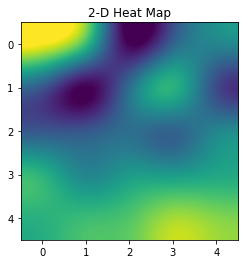

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

k = 5
values = np.empty((k,k), int)

index = -1
for entrie in data:
    min_position = (0,0)
    min_dist = 999
    index += 1
    for row in grid:
        for col in row:
            w = col.weights
            dist = np.linalg.norm(entrie-w)
            if dist < min_dist:
                min_position = col.position
                min_dist = dist
                grid[min_position[0], min_position[1]].count += 1
                grid[min_position[0], min_position[1]].add_element(countries[index])
                values[min_position[0], min_position[1]] += 1


plt.imshow( values, interpolation = 'nearest' )
for i in range(len(grid)):
    col = grid[i]
    for j in range(len(col)):
        print('Neurona (', i,',',j,') tiene a: ', grid[i][j].elements)
plt.title( "2-D Heat Map" )
plt.show()